In [16]:
from sklearn.tree import DecisionTreeClassifier
import pickle
from matplotlib import pyplot as plt

# Base risco de crédito 

In [10]:
with open('../data-pickles/risco_credito.pkl', 'rb') as file:
    X_risco_credito, y_risco_credito = pickle.load(file)
    
X_risco_credito.shape, y_risco_credito.shape

((14, 4), (14,))

In [11]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(X_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [24]:
arvore_risco_credito.feature_importances_
arvore_risco_credito.classes_

array([0.41391643, 0.06408636, 0.03885431, 0.4831429 ])

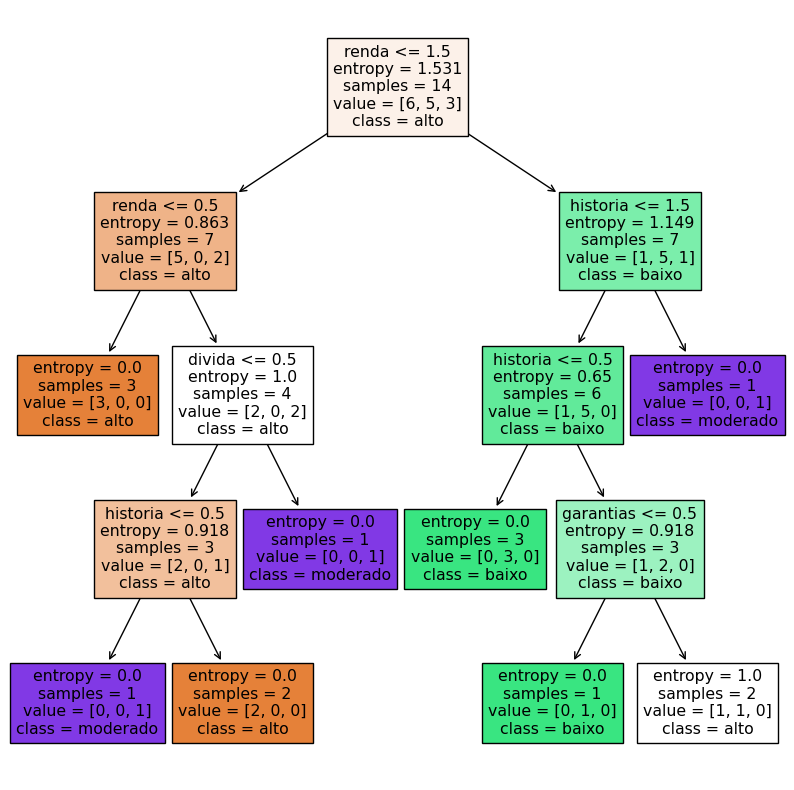

In [29]:
from sklearn import tree
previsores_risco = ['historia', 'divida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores_risco, class_names = list(arvore_risco_credito.classes_), filled=True);

In [30]:
# historia boa (0), divida alta (0), garantias nenhuma (1), renda >35 (2)
# historia ruim (2), divida alta (0), garantias adequada (0), renda <15 (0)

previsores_risco = arvore_risco_credito.predict([[0, 0, 1, 2], [2, 0, 0, 0]])
previsores_risco

array(['baixo', 'alto'], dtype=object)

# Base credit data - 98.20%

In [32]:
with open('../data-pickles/credit.pkl', mode = 'rb') as file:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(file)

X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [33]:
arvore_credit = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
arvore_credit.fit(X_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [34]:
previsoes_credit = arvore_credit.predict(X_credit_teste)
previsoes_credit

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [35]:
from sklearn.metrics import accuracy_score

accuracy_score(y_credit_teste, previsoes_credit)

0.982

0.982

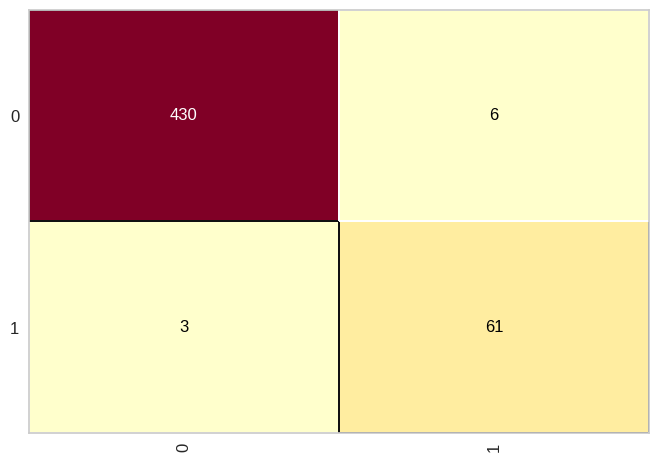

In [36]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(arvore_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_credit_teste, previsoes_credit))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



# Base census - 81.04%

In [38]:
with open('../data-pickles/census.pkl', 'rb') as file:
    X_census_treinamento, y_census_treinamento, X_census_testes, y_census_teste = pickle.load(file)
    
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 116), (27676,))

In [39]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(X_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [40]:
previsoes_census = arvore_census.predict(X_census_testes)
accuracy_score(y_census_teste, previsoes_census)

0.8149437052200614

0.8149437052200614

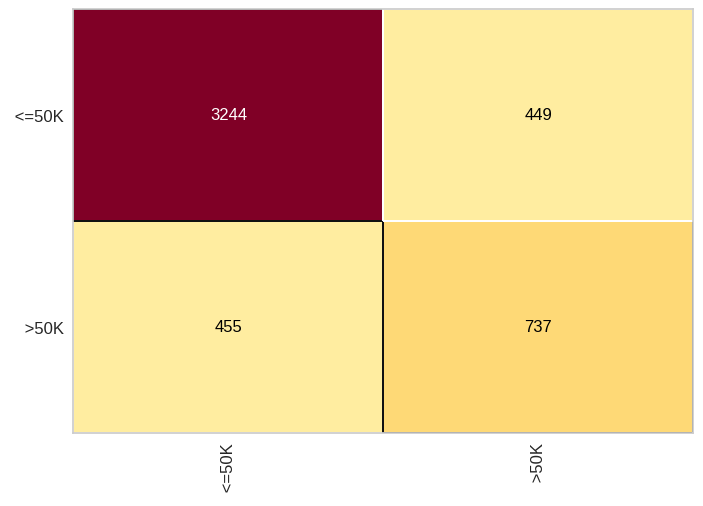

In [41]:
cm = ConfusionMatrix(arvore_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_testes, y_census_teste)

In [42]:
print(classification_report(y_census_teste, previsoes_census))

              precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      3693
        >50K       0.62      0.62      0.62      1192

    accuracy                           0.81      4885
   macro avg       0.75      0.75      0.75      4885
weighted avg       0.81      0.81      0.81      4885

